In [24]:
import tensorflow as tf
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, BatchNormalization, Dropout

In [3]:
train_data = keras.utils.image_dataset_from_directory(
    directory = '/Users/shashankhmg/Documents/Kaagle_Projects/cats and dogs/dataset/archive/train',
    labels="inferred",
    label_mode="int", #cats will be assigned 0 and dogs as 1
    batch_size=32,
    image_size=(256, 256), #all of the images in our dataset are of diff size and hence we doing this
)


Found 20000 files belonging to 2 classes.


2024-07-28 14:49:58.461205: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M3
2024-07-28 14:49:58.461233: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 16.00 GB
2024-07-28 14:49:58.461240: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 5.33 GB
2024-07-28 14:49:58.461276: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2024-07-28 14:49:58.461289: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


In [4]:
val_data = keras.utils.image_dataset_from_directory(
    directory = '/Users/shashankhmg/Documents/Kaagle_Projects/cats and dogs/dataset/archive/test',
    labels="inferred",
    label_mode="int", #cats will be assigned 0 and dogs as 1
    batch_size=32,
    image_size=(256, 256), #all of the images in our dataset are of diff size and hence we doing this
)


Found 5000 files belonging to 2 classes.


In [5]:
#our images are being saved in numpy array, and we will have to normalize 

def process(image, label):
    image = tf.cast(image/255. , tf.float32)
    return image, label

train_data = train_data.map(process)
val_data = val_data.map(process)

In [14]:
#CNN Architecture 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation= 'relu', padding= 'valid', input_shape = (256,256,3)))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), activation= 'relu', padding= 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), activation= 'relu', padding= 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dense(64,activation = 'relu'))
model.add(Dense(1,activation = 'sigmoid'))


/opt/anaconda3/envs/lgm/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [16]:
model.summary()

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_2 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,847,297 (56.64 MB)

 Trainable params: 14,847,297 (56.64 MB)

 Non-trainable params: 0 (0.00 B)

In [17]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [19]:
history = model.fit(train_data,validation_data=val_data, epochs = 10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 109s 174ms/step - accuracy: 0.6731 - loss: 0.5942 - val_accuracy: 0.7750 - val_loss: 0.4751
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 137s 219ms/step - accuracy: 0.7740 - loss: 0.4655 - val_accuracy: 0.7876 - val_loss: 0.4568
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 122s 195ms/step - accuracy: 0.8361 - loss: 0.3675 - val_accuracy: 0.7966 - val_loss: 0.4653
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 121s 194ms/step - accuracy: 0.8939 - loss: 0.2478 - val_accuracy: 0.8022 - val_loss: 0.6531
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 129s 206ms/step - accuracy: 0.9445 - loss: 0.1412 - val_accuracy: 0.7988 - val_loss: 0.8523
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 140s 224ms/step - accuracy: 0.9664 - loss: 0.0960 - val_accuracy: 0.7950 - val_loss: 1.0299
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 132s 210ms/step - accuracy: 0.9760 - loss: 0.0640 - val_accuracy: 0.7590 - val_loss: 1.2473
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 128s 204ms/step - accuracy: 0.9751 -

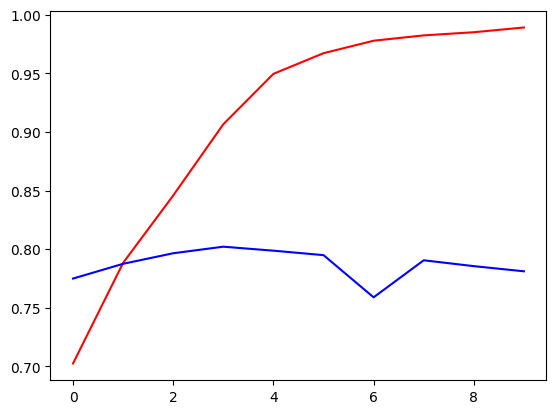

In [22]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'val')

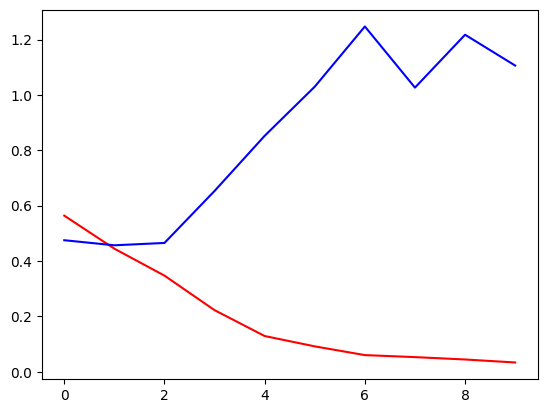

In [23]:
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'val')

In [ ]:
#THERE IS A CLEAR OVERFITTING IN OUR MODEL HENCE WE CAN USE BATCH NORM AND DROPOUT

In [25]:
#CNN Architecture 

model = Sequential()
model.add(Conv2D(32, kernel_size=(3,3), activation= 'relu', padding= 'valid', input_shape = (256,256,3)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(64, kernel_size=(3,3), activation= 'relu', padding= 'valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))

model.add(Conv2D(128, kernel_size=(3,3), activation= 'relu', padding= 'valid'))
model.add(MaxPooling2D(pool_size = (2,2), strides = 2, padding = 'valid'))
model.add(BatchNormalization())


model.add(Flatten())

model.add(Dense(128,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(64,activation = 'relu'))
model.add(Dropout(0.1))
model.add(Dense(1,activation = 'sigmoid'))


/opt/anaconda3/envs/lgm/lib/python3.9/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [26]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)               │ (None, 254, 254, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 254, 254, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 127, 127, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 125, 125, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 125, 125, 64)   │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 62, 62, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 60, 60, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 30, 30, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 30, 30, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_1 (Flatten)             │ (None, 115200)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 128)            │    14,745,728 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,848,193 (56.64 MB)

 Trainable params: 14,847,745 (56.64 MB)

 Non-trainable params: 448 (1.75 KB)

In [27]:
model.compile(optimizer='adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

In [ ]:
history = model.fit(train_data,validation_data=val_data, epochs = 10)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 267s 424ms/step - accuracy: 0.5991 - loss: 2.8743 - val_accuracy: 0.6882 - val_loss: 0.5821
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 306s 490ms/step - accuracy: 0.7405 - loss: 0.5284 - val_accuracy: 0.7518 - val_loss: 0.5114
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 332s 531ms/step - accuracy: 0.8070 - loss: 0.4284 - val_accuracy: 0.7386 - val_loss: 0.5521
Epoch 4/10
614/625 ━━━━━━━━━━━━━━━━━━━━ 6s 584ms/step - accuracy: 0.8451 - loss: 0.3562

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(history.history['accuracy'], color = 'red', label = 'train')
plt.plot(history.history['val_accuracy'], color = 'blue', label = 'val')

In [ ]:
import matplotlib.pyplot as plt 

plt.plot(history.history['loss'], color = 'red', label = 'train')
plt.plot(history.history['val_loss'], color = 'blue', label = 'val')